In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../')
sys.path.append('../src/')

In [5]:
import pandas as pd

In [4]:
demo = pd.read_excel('../data/demo.xlsx')
demo.head()

,N,ID,Gender,Age,Post onset,N of strokes,Stroke type,Handedness,Aphasia Type,Severity
0,1,2,f,47,19,1,ischemic,NaN,Acoustic-mnestic,Mild-moderate
1,2,3,m,78,5,1,hemorrhagic,NaN,Acoustic-mnestic,Severe
2,3,4,m,40,26,1,hemorrhagic,NaN,Dysarthria,Mild
3,4,5,f,70,15,1,ischemic,NaN,Sensory,Moderate
4,5,6,f,40,12,1,hemorrhagic,NaN,Acoustic-mnestic,Mild


In [5]:
demo['Aphasia Type'].value_counts()

Aphasia Type
Efferent motor + Afferent Motor    128
Sensory                             76
Efferent motor                      49
Dynamic                             46
Acoustic-mnestic                    43
Dysarthria                          26
Afferent motor                      21
Other (neurodynamics)               12
Semantic                             2
Acoustic-mnestic + Sensory           2
Amnestic                             1
Name: count, dtype: int64

In [6]:
demo['Severity'].value_counts()

Severity
Moderate           111
Mild-moderate       78
Very severe         69
Moderate-severe     50
Mild                46
Severe              44
Very mild            3
Name: count, dtype: int64

In [17]:
asa = pd.read_excel("../data/asa.xlsx")
asa_before = asa["ASA_before"].dropna().values

In [26]:
from src.common.utils import reg_to_clf_target
import numpy as np

np.unique(reg_to_clf_target(asa_before, "asa"), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([29, 71, 67, 34, 34, 58]))

In [34]:
np.sum(np.where(asa_before < 90))

10859

In [35]:
np.where(asa_before < 90)

(array([ 37,  40,  42,  87,  88,  89,  91, 103, 112, 114, 134, 143, 146,
        147, 148, 149, 150, 154, 157, 158, 160, 162, 163, 170, 173, 182,
        185, 189, 192, 194, 195, 196, 199, 201, 203, 204, 218, 221, 222,
        223, 224, 226, 230, 237, 241, 246, 254, 260, 270, 271, 273, 274,
        277, 279, 287, 288, 290, 291]),)

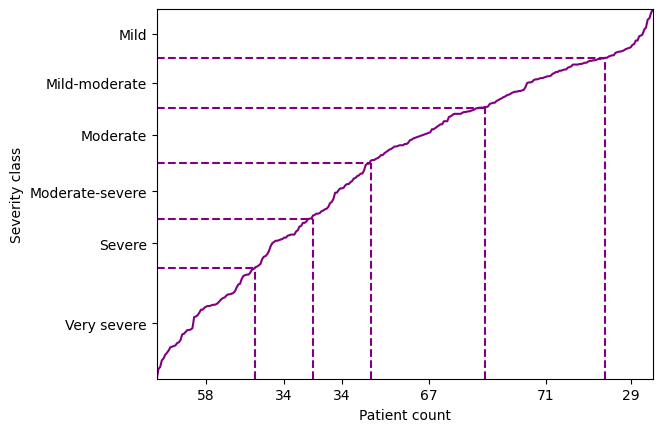

In [99]:
import matplotlib.pyplot as plt
import numpy as np

scores = [90, 130, 175, 220, 260]

# counts = [29, 100, 167, 201, 235]
counts = [58, 92, 126, 193, 264]

scores_mid = [45, 110, 152, 198, 240, 280]
count_mid = [29, 75, 109, 160, 229, 279]


fig, ax = plt.subplots()

ax.margins(0)

ax.vlines(counts, 0, scores, linestyle="dashed", colors="purple")
ax.hlines(scores, 0, counts, linestyle="dashed", colors="purple")

ax.tick_params(axis='y', which='minor', tick1On=False, tick2On=False)
ax.yaxis.set_ticks(scores_mid, labels=["Mild", "Mild-moderate", "Moderate", "Moderate-severe", "Severe", "Very severe"][::-1])
ax.xaxis.set_ticks(count_mid, labels=[29, 71, 67, 34, 34, 58][::-1])

ax.set_xlabel("Patient count")
ax.set_ylabel("Severity class")
ax.plot(sorted(asa_before), c="purple")

In [154]:
from src.data.tab import severity_map, usable_types

demo = demo.insert(0, "Severity_num", demo["Severity"].map(severity_map))

ValueError: cannot insert Severity_num, already exists

In [123]:
demo = demo[demo["Severity"].notna() & demo["Aphasia Type"].notna() & ~demo["Aphasia Type"].isin(unusable_types)]

In [130]:
demo["Severity_num"].max()

5.0

In [157]:
demo

In [163]:
from src.data.tab import usable_types

demo = pd.read_excel("../data/demo.xlsx")
asa = pd.read_excel("../data/asa.xlsx")

demo.insert(0, "asa", asa["ASA_before"])
demo = demo[demo["Aphasia Type"].isin(usable_types) & demo["asa"].notna()]

demo

,asa,N,ID,Gender,Age,Post onset,N of strokes,Stroke type,Handedness,Aphasia Type,Severity
0,251.0,1,2,f,47,19,1,ischemic,NaN,Acoustic-mnestic,Mild-moderate
1,174.5,2,3,m,78,5,1,hemorrhagic,NaN,Acoustic-mnestic,Severe
3,181.5,4,5,f,70,15,1,ischemic,NaN,Sensory,Moderate
4,292.5,5,6,f,40,12,1,hemorrhagic,NaN,Acoustic-mnestic,Mild
5,240.5,6,7,m,49,39,2,ischemic,right,Efferent motor + Afferent Motor,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
394,0.0,395,1002,m,67,1,1,ischemic,NaN,Efferent motor + Afferent Motor,Very severe
395,166.5,396,1003,f,58,5,1,ischemic,right,Efferent motor + Afferent Motor,Moderate-severe
398,16.5,399,1006,m,49,2,1,ischemic,right,Sensory,Very severe
399,60.0,400,1007,m,56,6,1,ischemic,right,Afferent motor,Very severe


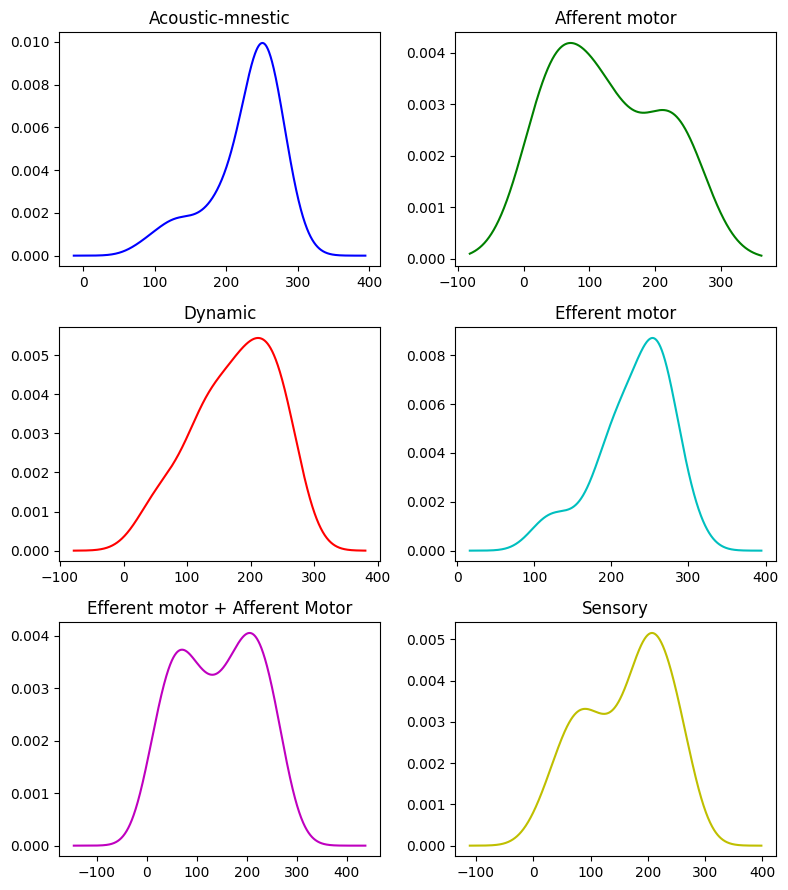

In [168]:
# import matplotlib.gridspec as gridspec

# fig = plt.figure(figsize=(8, 9))
# gs = gridspec.GridSpec(3, 2)

# c_list = "bgrcmyk"
# i=0
# for label, df in demo.groupby('Aphasia Type'):
#     if df.asa.shape[0] > 1:
#         ax = plt.subplot(gs[i // 2, (i % 2):(i % 2) + 1])
#         df.asa.plot(kind="kde", title=label, ax=ax, c=c_list[i])
#         ax.set_ylabel("")
#         i += 1

# plt.tight_layout()
# plt.show()

In [233]:
for i, (label, df) in enumerate(demo[demo["Aphasia Type"].isin(usable_types)].groupby('Aphasia Type')):
    print(df.asa.shape)

(43,)
(21,)
(46,)
(26,)
(49,)
(128,)
(76,)


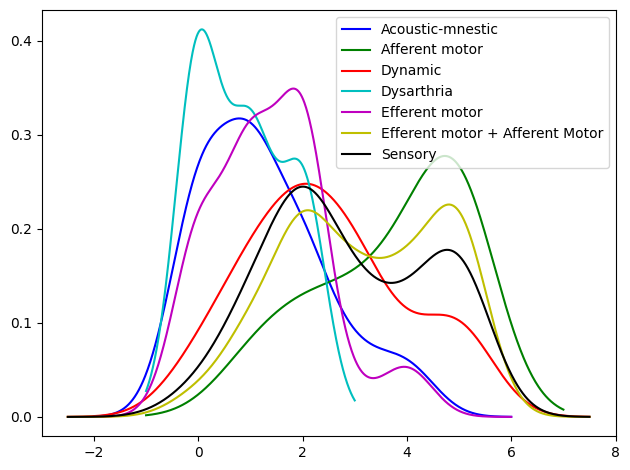

In [239]:
fig, ax = plt.subplots()

c_list = "bgrcmyk"
for i, (label, df) in enumerate(demo[demo["Aphasia Type"].isin(usable_types)].groupby('Aphasia Type')):
    if df[df.sev_num.notna()].asa.shape[0] > 1:
        df.sev_num.plot(kind="kde", label=label, ax=ax, c=c_list[i])
        ax.set_ylabel("")

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
asa = pd.read_excel("../data/asa.x")

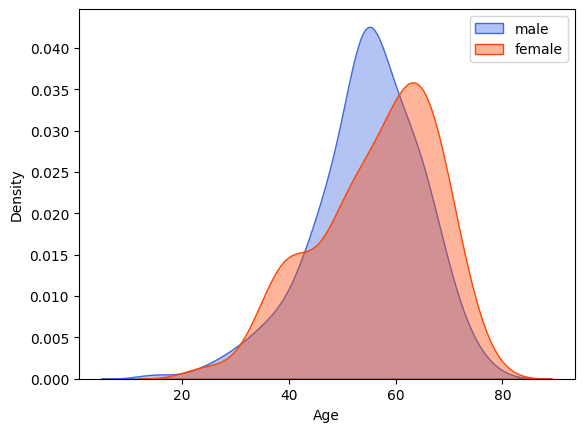

In [173]:
import seaborn as sns

demo = pd.read_excel("../data/demo.xlsx")

m = demo[demo["Gender"] == "m"]["Age"].dropna()
f = demo[demo["Gender"] == "f"]["Age"].dropna()

L1 = sns.kdeplot(m, fill=True, label="male", color="royalblue", alpha=0.4)
L2 = sns.kdeplot(f, fill=True, label="female", color="orangered", alpha=0.4)
L2.legend()

In [214]:
from src.data.tab import usable_types

demo = pd.read_excel("../data/demo.xlsx")
asa = pd.read_excel("../data/asa.xlsx")
wm = pd.read_excel("../data/wm.xlsx")
gm = pd.read_excel("../data/gm.xlsx")

demo.insert(0, "asa", asa["ASA_before"])
demo.insert(0, "sev_num", demo["Severity"].map(severity_map, "ignore"))
demo.insert(0, "les_vol", wm["Lesion volume"])

In [221]:
wm.drop(columns=["N", "ID"])
corrs = [(c, -demo.asa.corr(wm[c])) for c in wm.columns]
corrs = sorted(corrs, key=lambda el: -el[1])
c, v = zip(*corrs)

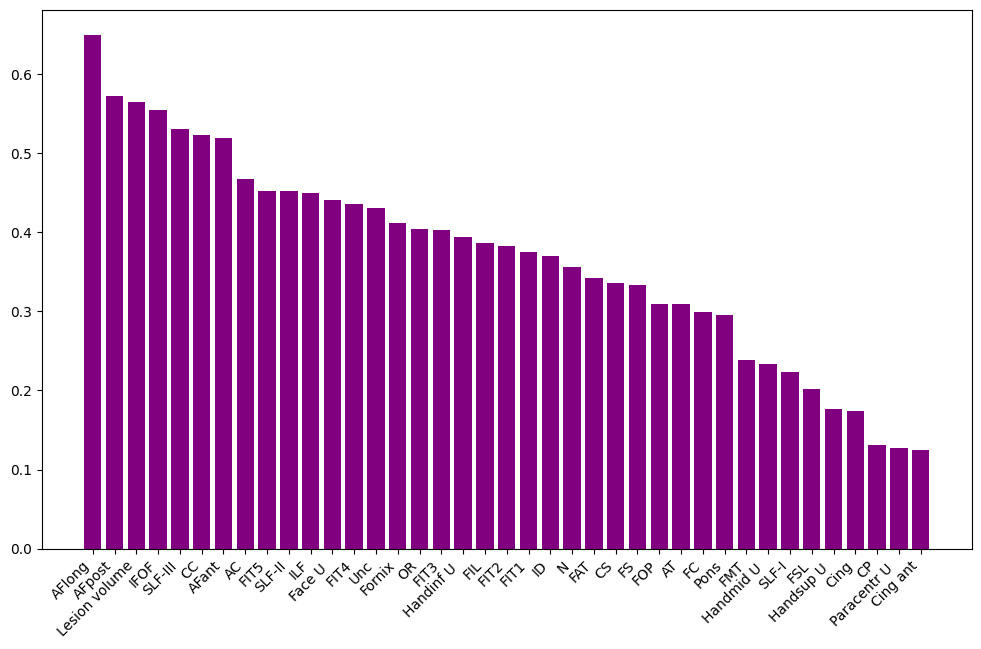

In [222]:
fig = plt.figure(figsize=(12, 7))
plt.bar(range(len(v)), v, tick_label=c, color="purple")
plt.xticks(rotation=45, ha="right")
plt.show()

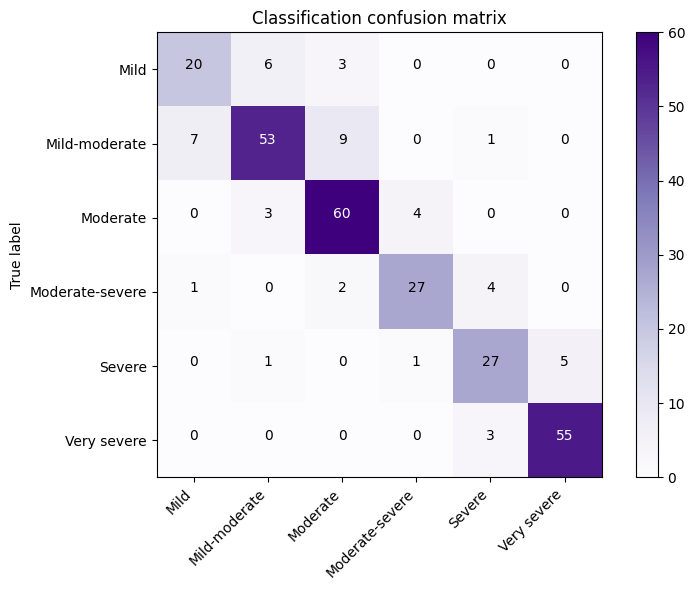

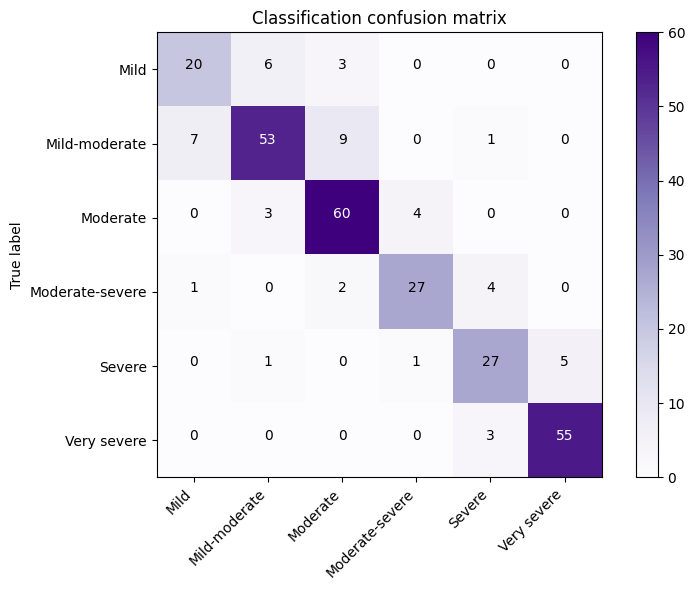

In [11]:
from src.common.utils import reg_to_clf_target, make_cm
from src.data.tab import severity_map

demo = pd.read_excel("../data/demo.xlsx")
asa = pd.read_excel("../data/asa.xlsx")

idx = demo["Severity"].notna() & asa["ASA_before"].notna()
sev = demo.loc[idx, "Severity"].map(severity_map).values
asa = reg_to_clf_target(asa.loc[idx, "ASA_before"].values, "asa")

make_cm(asa, sev, method="reg")

In [11]:
demo['Stroke type'].value_counts()

Stroke type
ischemic                  359
hemorrhagic                45
hemorrhagic + ischemic      1
aneurysm                    1
Name: count, dtype: int64

In [100]:
demo['N of strokes'].value_counts()

N of strokes
1    402
2      4
Name: count, dtype: int64

In [10]:
demo['Handedness'].isna().sum()

38

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

categoric_cols = ['Gender', 'Stroke type', 'Handedness']
target_cols = ['Aphasia Type', 'Severity']
unusable_types = ['Semantic', 'Acoustic-mnestic + Sensory', 'Amnestic', 'Other (neurodynamics)']
severity_map = {
    'Very mild': 0.0,
    'Mild': 1 / 6,
    'Mild-moderate': 2 / 6,
    'Moderate': 3 / 6,
    'Moderate-severe': 4 / 6,
    'Severe': 5 / 6,
    'Very severe': 1.0
}

In [18]:
def tabdata(matter, include_lesions=False, include_demo=False, method='clf', zscale=False, minmax=False, path_to_data='../datasets'):
    wm = pd.read_excel(f'{path_to_data}/wm.xlsx').drop(columns=['N', 'ID']).reset_index()
    gm = pd.read_excel(f'{path_to_data}/gm.xlsx').drop(columns=['N', 'ID']).reset_index()
    demo = pd.read_excel(f'{path_to_data}/demo.xlsx').drop(columns=['N', 'ID']).reset_index()

    if matter == 'grey':
        df = gm
    elif matter == 'white':
        df = wm
    else:
        df = pd.concat([gm, wm], axis=1)

    if include_lesions and matter == 'grey':
        df.insert(1, 'lesions', wm['Lesion volume'])
    elif not include_lesions and matter != 'grey':
        df = df.drop(columns=['Lesion volume'])

    demo['Handedness'].fillna('left', inplace=True)
    demo.replace('relearnt left', 'left', inplace=True)
    demo.replace('right/ambi', 'ambi', inplace=True)
    demo_dummies = pd.get_dummies(demo.drop(columns=target_cols))
    demo_dummies.loc[demo_dummies['Handedness_ambi'], ['Handedness_left', 'Handedness_right']] = True
    demo_dummies.loc[demo_dummies['Stroke type_hemorrhagic + ischemic'], ['Stroke type_hemorrhagic', 'Stroke type_ischemic']] = True
    demo_dummies.drop(columns=['Handedness_ambi', 'Stroke type_hemorrhagic + ischemic', 'Stroke type_aneurysm'], inplace=True)
        # df = pd.concat([df, demo_dummies], axis=1)

    if method == 'clf':
        usable = ~demo['Aphasia Type'].isin(unusable_types)
        df, demo = df[usable], demo[usable]
        target = pd.Categorical(demo['Aphasia Type']).codes
    else:
        usable = demo['Severity'].notna()
        df, demo = df[usable], demo[usable]
        target = demo['Severity'].map(severity_map).to_numpy(dtype=np.float32)

    print(demo['Aphasia Type'])
    print(pd.Categorical(demo['Aphasia Type']).describe())

    X_labels = list(df.columns.values)
    X = df.to_numpy(dtype=np.float32)
    if zscale:
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    if minmax:
        X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    return X, target, X_labels, demo_dummies


In [28]:
X_white, y, labels_white, demo = tabdata(matter='white')

0                     Acoustic-mnestic
1                     Acoustic-mnestic
2                           Dysarthria
3                              Sensory
4                     Acoustic-mnestic
                    ...               
401                         Dysarthria
402    Efferent motor + Afferent Motor
403    Efferent motor + Afferent Motor
404                         Dysarthria
405                     Afferent motor
Name: Aphasia Type, Length: 389, dtype: object
                                 counts     freqs
categories                                       
Acoustic-mnestic                     43  0.110540
Afferent motor                       21  0.053985
Dynamic                              46  0.118252
Dysarthria                           26  0.066838
Efferent motor                       49  0.125964
Efferent motor + Afferent Motor     128  0.329049
Sensory                              76  0.195373
[0 0 3 6 0 5 4 5 3 0 4 5 4 5 0 4 4 2 0 5 0 6 5 6 4 4 0 0 2 5 5 6 6 6 4 0 6

In [29]:
types = ['Acoustic-mnestic', 'Afferent motor', 'Dynamic', 'Dysarthria', 'Efferent motor', 'Efferent motor + Afferent Motor', 'Sensory']

In [31]:
i = 0
X_class = X_white[y == i]
class_stats = (np.mean(X_class, axis=0), np.std(X_class, axis=0))

print(f"For class {types[i]}:")
i += 1
cur_df = pd.DataFrame(class_stats, columns=labels_white)
cur_df = cur_df.sort_values(cur_df.last_valid_index(), axis=1, ascending=False).drop(columns=['index'])
cur_df


For class Acoustic-mnestic:


,FIT1,FIT2,FIT3,FIT4,FIT5,AFpost,Handmid U,Handsup U,FIL,Face U,...,IFOF,Cing ant,Cing,ILF,OR,FC,Fornix,AC,CC,CP
0,0.24713,0.247367,0.278615,0.228513,0.193498,0.156615,0.075458,0.076964,0.154219,0.099623,...,0.089656,0.020515,0.029798,0.071355,0.055433,0.030817,0.037618,0.048580,0.039284,0.011973
1,0.38900,0.375150,0.356840,0.303320,0.273823,0.242151,0.229263,0.228295,0.225214,0.211265,...,0.114345,0.100213,0.096542,0.094669,0.090672,0.070575,0.066249,0.063805,0.056852,0.036316


TypeError: only size-1 arrays can be converted to Python scalars

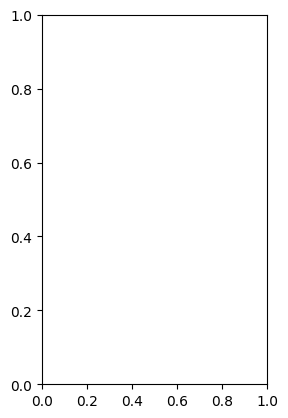

In [35]:
plt.subplot(1, 2, 1)
plt.bar(cur_df.iloc[[0]], height=5)
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')


plt.subplot(1, 2, 2)
plt.bar(cur_df.iloc[[1]], height=5)
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()